# Backtesting Signal Strategy from Python for Finance on Different Time Period

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from datetime import datetime

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [55]:
# Define start and end date
start = datetime(2010, 8, 10)
end = datetime(2020, 8, 12)

In [135]:
# Import the adjusted closing prices for these stocks from Yahoo Finance
sp500 = pd.DataFrame(data.DataReader('^GSPC', data_source='yahoo', start=start, end=end)['Adj Close'])

In [136]:
# Inspect the first 5 rows
sp500.head()

,Adj Close
Date,
2010-08-09,1127.790039
2010-08-10,1121.060059
2010-08-11,1089.469971
2010-08-12,1083.609985
2010-08-13,1079.250000


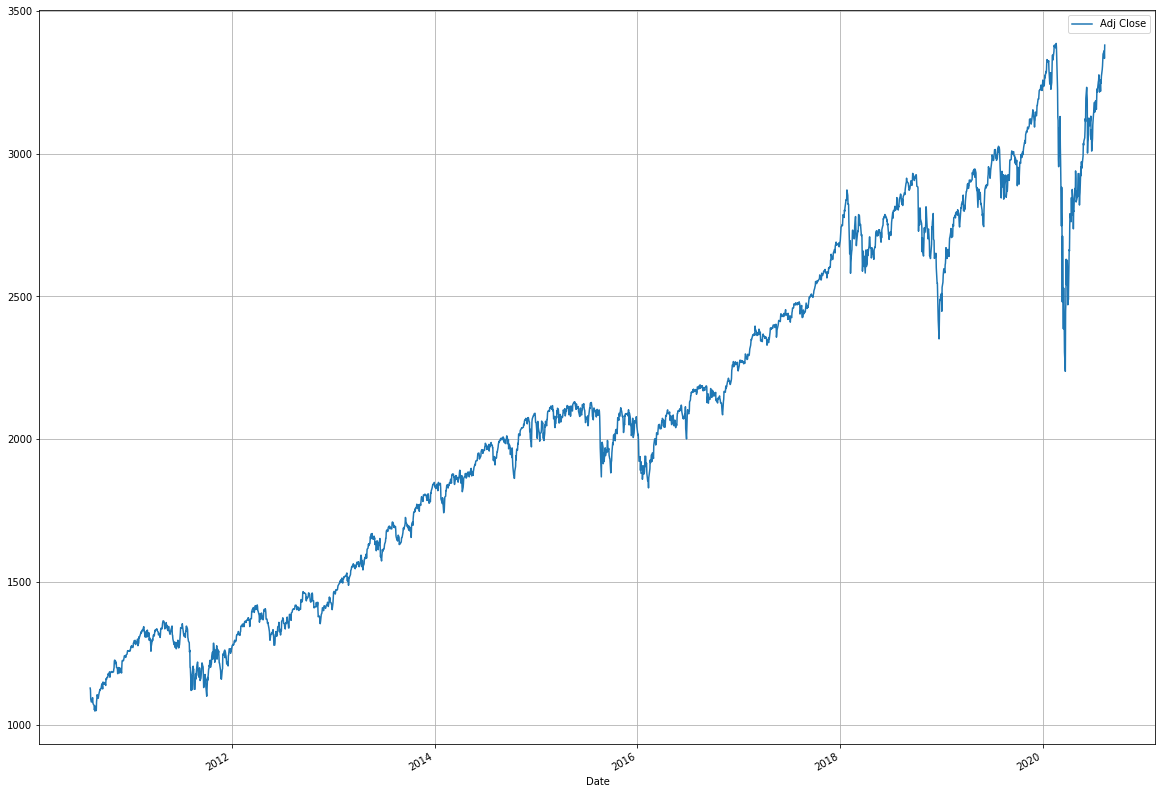

In [137]:
sp500.plot(grid=True, figsize=(20,15))

In [140]:
sp500['42d'] = np.round(sp500['Adj Close'].rolling(42).mean(), 2) 
sp500['252d'] = np.round(sp500['Adj Close'].rolling(252).mean(), 2)

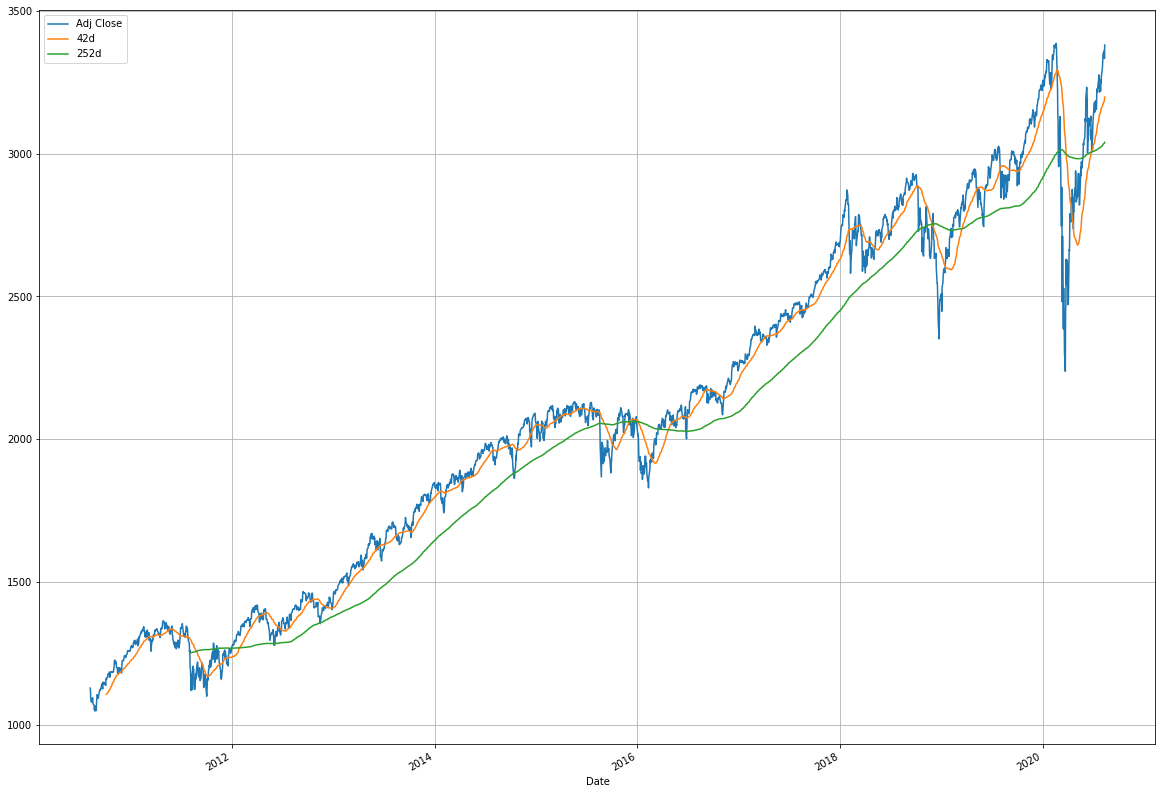

In [141]:
sp500.plot(grid=True, figsize=(20,15))

In [142]:
sp500['42-252'] = sp500['42d'] - sp500['252d']

In [143]:
SD=50
sp500['Regime'] = np.where(sp500['42-252'] > SD, 1, 0) 
sp500['Regime'] = np.where(sp500['42-252'] < -SD, -1, sp500['Regime']) 
sp500['Regime'].value_counts()

 1    1675
 0     612
-1     234
Name: Regime, dtype: int64

(-1.1, 1.1)

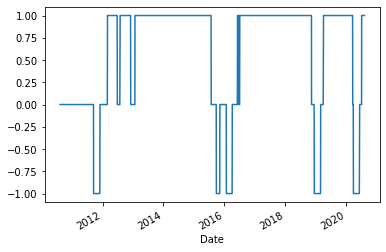

In [144]:
sp500['Regime'].plot(lw=1.5) 
plt.ylim([-1.1, 1.1])

In [145]:
sp500['Market'] = np.log(sp500['Adj Close'] / sp500['Adj Close'].shift(1))

In [146]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

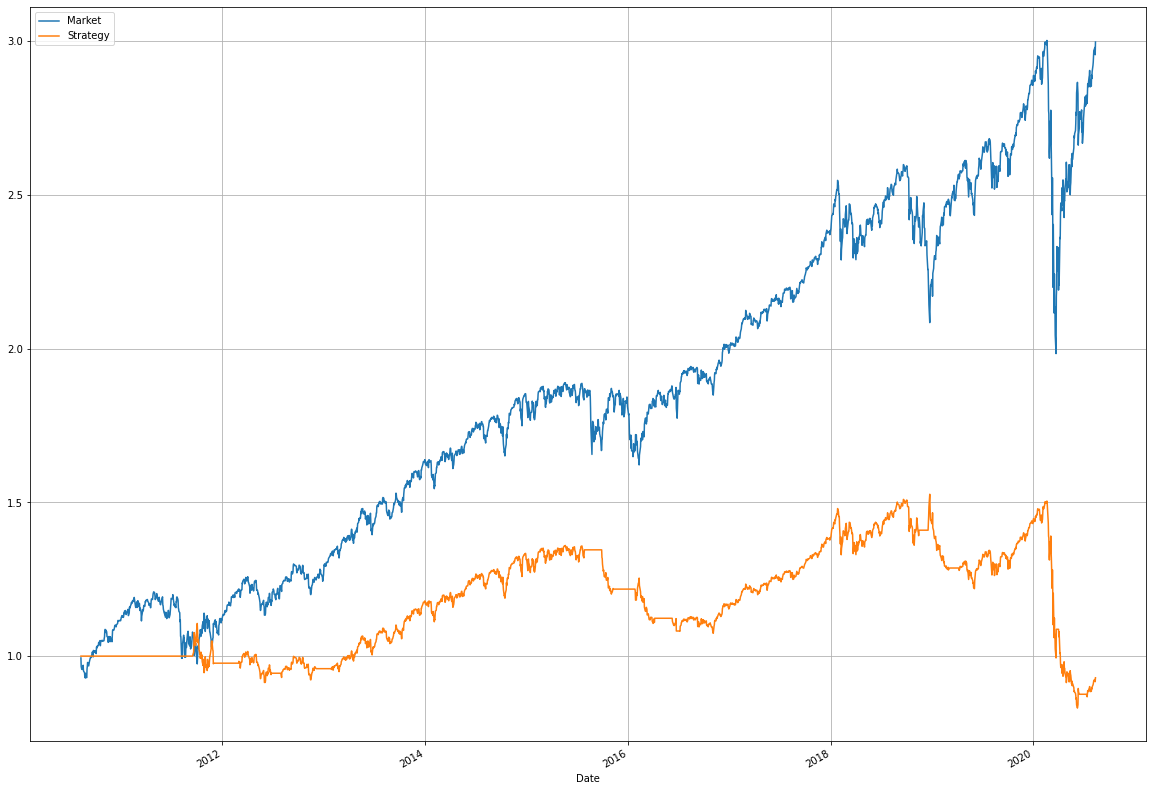

In [147]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(20, 15))